# Sandbox

## Clustering 3 classifications

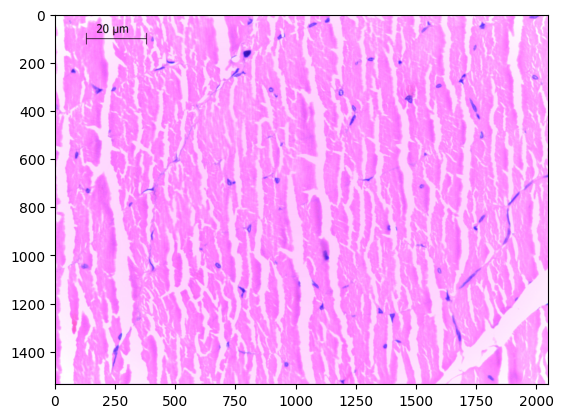

In [9]:
# Load image as an array of pixels

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('RawData/Rato1FDControle7.jpg')

# Display image
plt.imshow(img)
plt.show()

In [10]:
from sklearn.cluster import KMeans

# Reshape
X = img.reshape(-1, 3)

#KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(X)

# Predict
y_kmeans = kmeans.predict(X)

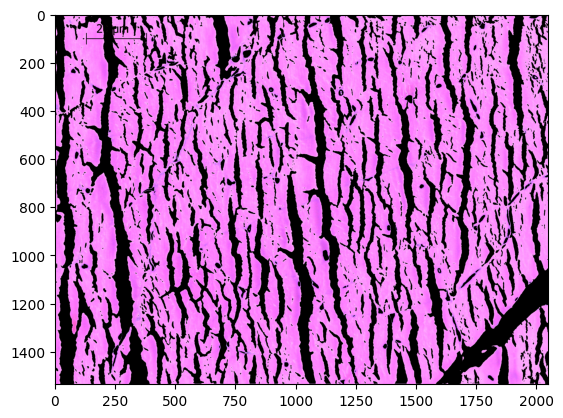

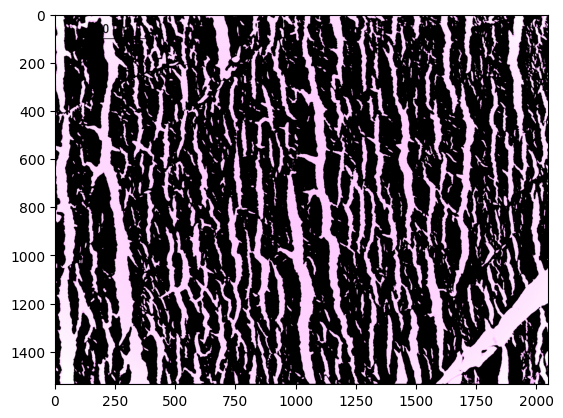

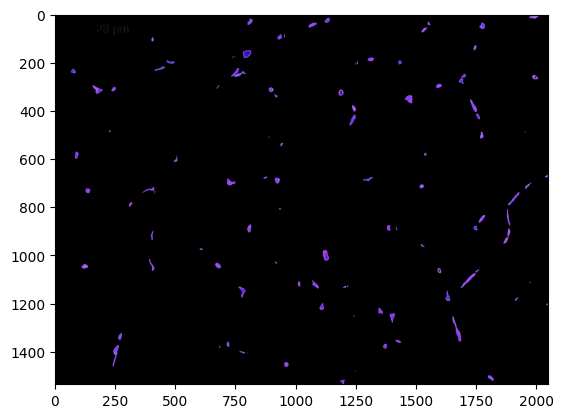

In [11]:
for i in range(0, num_clusters):
    img_compressed = X.copy()
    img_compressed[y_kmeans != i] = [0, 0, 0]
    img_compressed = img_compressed.reshape(img.shape)

    plt.imshow(img_compressed)
    plt.show()

### Counting each class

In [12]:
import pandas as pd

# Store the number of pixels in each cluster
df = pd.DataFrame()
df['cluster'] = y_kmeans
df['cluster'].value_counts() / len(df)

cluster
0    0.680387
1    0.310196
2    0.009417
Name: count, dtype: float64

## Método do Cotovelo

In [34]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    
    return wcss

In [35]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 16, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [36]:
wcss = calculate_wcss(X)
n = optimal_number_of_clusters(wcss)
print(n)

7


In [37]:
from sklearn.cluster import KMeans

# Reshape
X = img.reshape(-1, 3)

#KMeans
kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

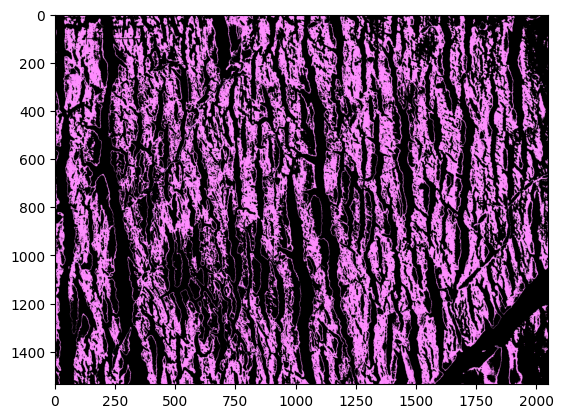

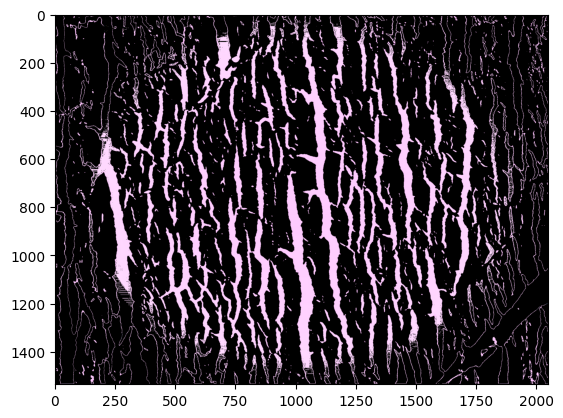

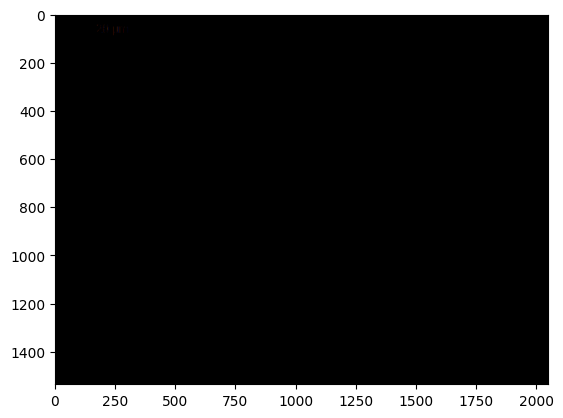

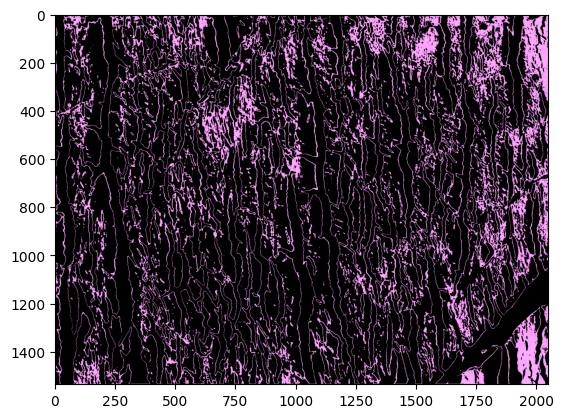

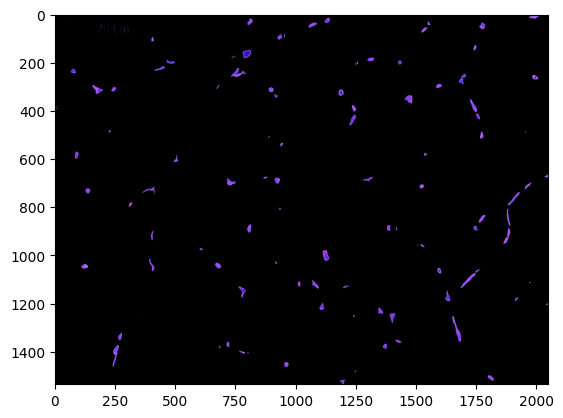

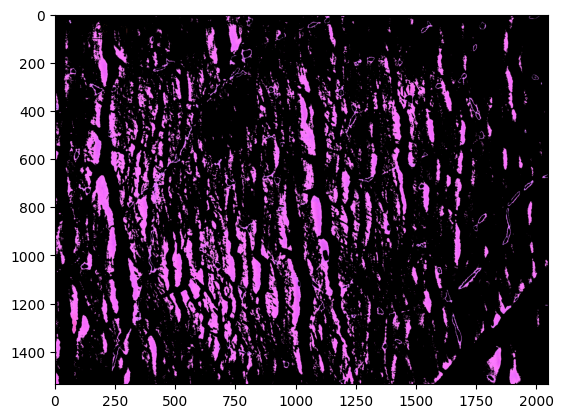

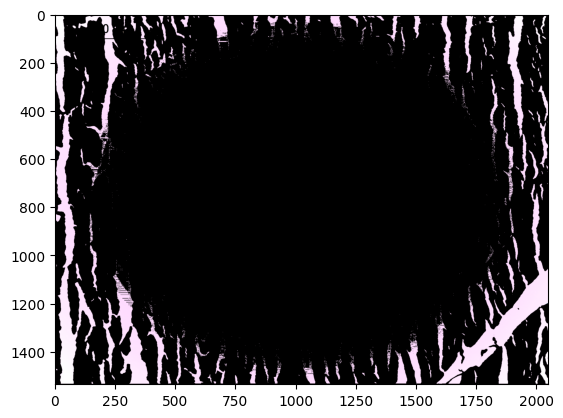

In [38]:
images = []

for i in range(0, n):
    images.append(X.copy())
    images[i][y_kmeans != i] = [0, 0, 0]
    images[i] = images[i].reshape(img.shape)

    plt.imshow(images[i])
    plt.show()

## Crop testing

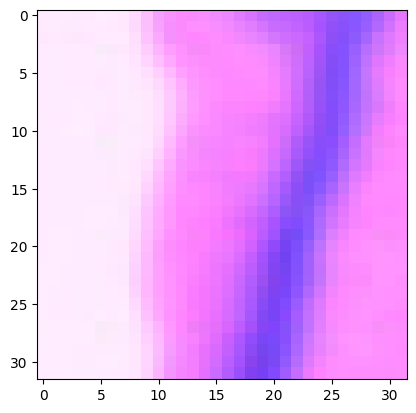

cluster
0    0.470703
1    0.340820
2    0.188477
Name: count, dtype: float64


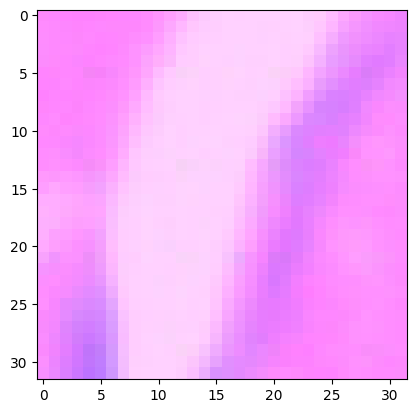

cluster
0    0.635742
1    0.363281
2    0.000977
Name: count, dtype: float64


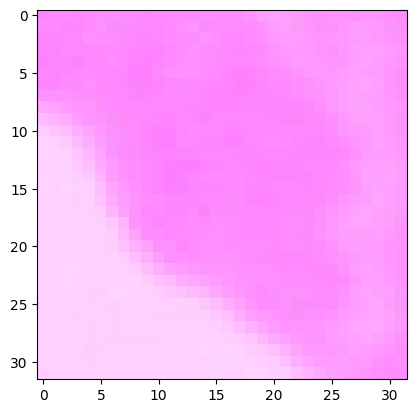

cluster
0    0.753906
1    0.246094
Name: count, dtype: float64


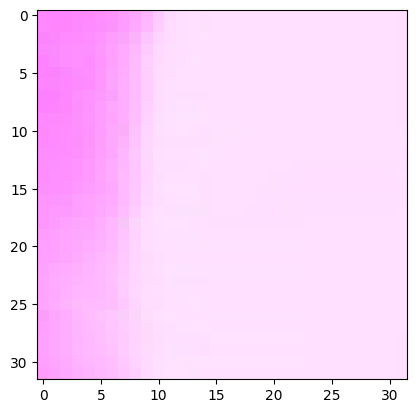

cluster
1    0.813477
0    0.186523
Name: count, dtype: float64


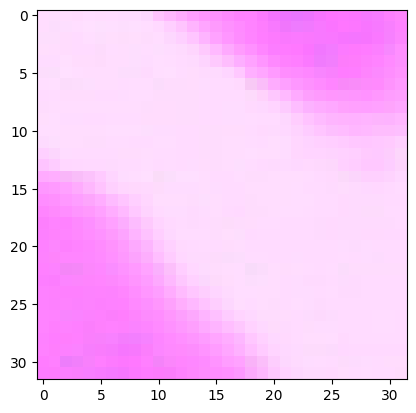

cluster
1    0.676758
0    0.323242
Name: count, dtype: float64


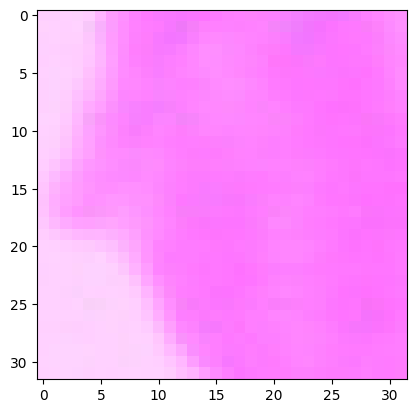

cluster
0    0.800781
1    0.199219
Name: count, dtype: float64


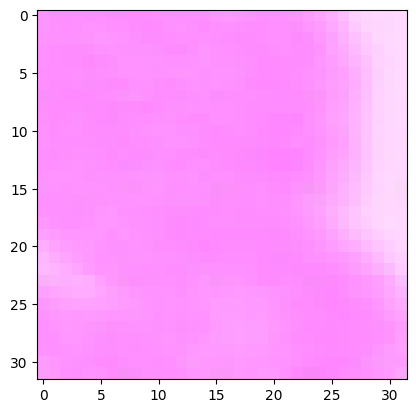

cluster
0    0.885742
1    0.114258
Name: count, dtype: float64


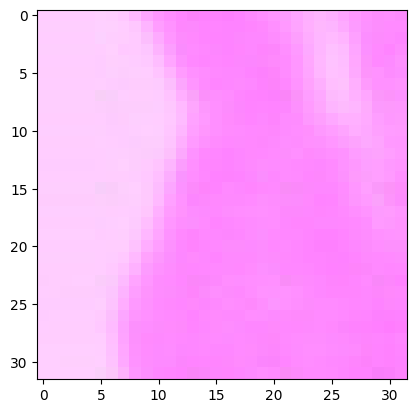

cluster
0    0.666992
1    0.333008
Name: count, dtype: float64


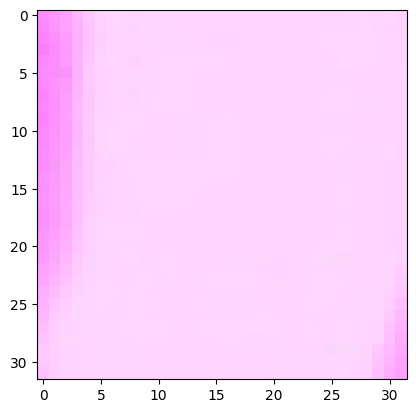

cluster
1    0.926758
0    0.073242
Name: count, dtype: float64


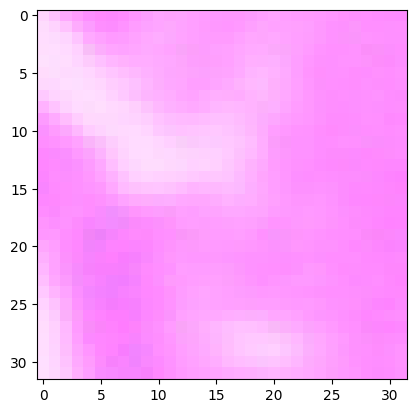

cluster
0    0.774414
1    0.225586
Name: count, dtype: float64


In [51]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

img = 'RawData/Rato1FDControle7.jpg'

image = Image.open(img)
new_size = 32
width, height = image.size
n_sample = 10

for i in range(n_sample):
    # Crop the image to random 16x16 frame
    left = np.random.randint(0, width - new_size)
    top = np.random.randint(0, height - new_size)
    right = left + new_size
    bottom = top + new_size

    cropped_image = image.crop((left, top, right, bottom))

    # Show cropped image
    plt.imshow(cropped_image)
    plt.show()

    sample_prediction = kmeans.predict(np.array(cropped_image).reshape(-1, 3))

    # Count the percentage of pixels in each cluster
    df = pd.DataFrame()
    df['cluster'] = sample_prediction
    print(df['cluster'].value_counts() / len(df))

# K-Means Model

## Model creation and data fit

In [10]:
# Load all images inside /training folder and reshape them
from PIL import Image
import numpy as np
import os

folder = 'training/'

X = []

for filename in os.listdir(folder):
    img = Image.open(folder + filename)
    img = img.resize((512, 512))
    img = np.array(img)
    X.append(img)

X = np.array(X)
X = X.reshape(-1, 3)

In [11]:
from sklearn.cluster import KMeans

#KMeans
cluster_num = 3
kmeans_model = KMeans(n_clusters=cluster_num, random_state=1)

kmeans_model.fit(X)

KeyboardInterrupt: 

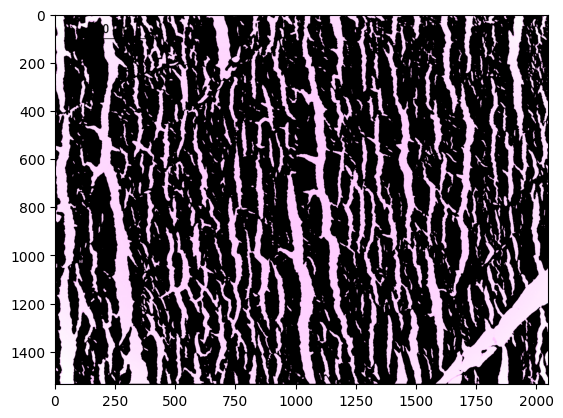

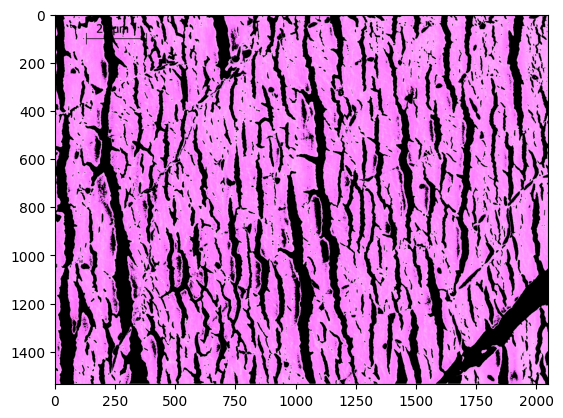

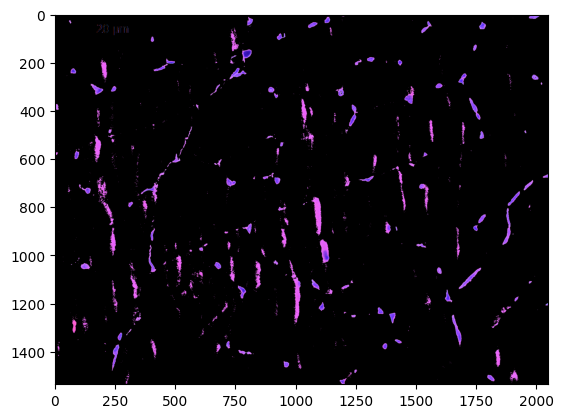

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('RawData/Rato1FDControle7.jpg')
validation_img = img.reshape(-1, 3)

# Show clusters and black pixels that are not in the cluster
y_kmeans = kmeans_model.predict(validation_img)

for i in range(0, cluster_num):
    img_compressed = validation_img.copy()
    img_compressed[y_kmeans != i] = [0, 0, 0]
    img_compressed = img_compressed.reshape(img.shape)

    plt.imshow(img_compressed)
    plt.show()
